In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tejashvi14/travel-insurance-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 13.0k/13.0k [00:00<00:00, 18.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tejashvi14/travel-insurance-prediction-data/versions/4


<h1> Check data <h1>

In [4]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/tejashvi14/travel-insurance-prediction-data/versions/4/TravelInsurancePrediction.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
df.columns


Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [8]:
df.shape

(1987, 10)

In [9]:
#change column name
df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)

In [10]:
df.columns

Index(['Index', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [11]:
df.head()

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<h1>Check values in columns <h1>

In [12]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [13]:
df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['FamilyMembers'].unique()

array([6, 7, 4, 3, 8, 9, 5, 2])

In [15]:
df['ChronicDiseases'].unique()

array([1, 0])

In [16]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['TravelInsurance'].unique()

array([0, 1])

In [19]:
df.dtypes

,0
Index,int64
Age,int64
Employment Type,object
GraduateOrNot,object
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
FrequentFlyer,object
EverTravelledAbroad,object
TravelInsurance,int64


<h1> select only important columns <h1>


In [20]:
df_filtered = df.drop({'Index','TravelInsurance'},axis = 1)

In [21]:
print(df_filtered)

      Age               Employment Type GraduateOrNot  AnnualIncome  \
0      31             Government Sector           Yes        400000   
1      31  Private Sector/Self Employed           Yes       1250000   
2      34  Private Sector/Self Employed           Yes        500000   
3      28  Private Sector/Self Employed           Yes        700000   
4      28  Private Sector/Self Employed           Yes        700000   
...   ...                           ...           ...           ...   
1982   33  Private Sector/Self Employed           Yes       1500000   
1983   28  Private Sector/Self Employed           Yes       1750000   
1984   28  Private Sector/Self Employed           Yes       1150000   
1985   34  Private Sector/Self Employed           Yes       1000000   
1986   34  Private Sector/Self Employed           Yes        500000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  
0                 6                1            No                  No  
1

In [22]:
df_filtered.isna().sum()

,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0


In [23]:
df_filtered.dtypes

,0
Age,int64
Employment Type,object
GraduateOrNot,object
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
FrequentFlyer,object
EverTravelledAbroad,object


<h1> detected outlier <h1>

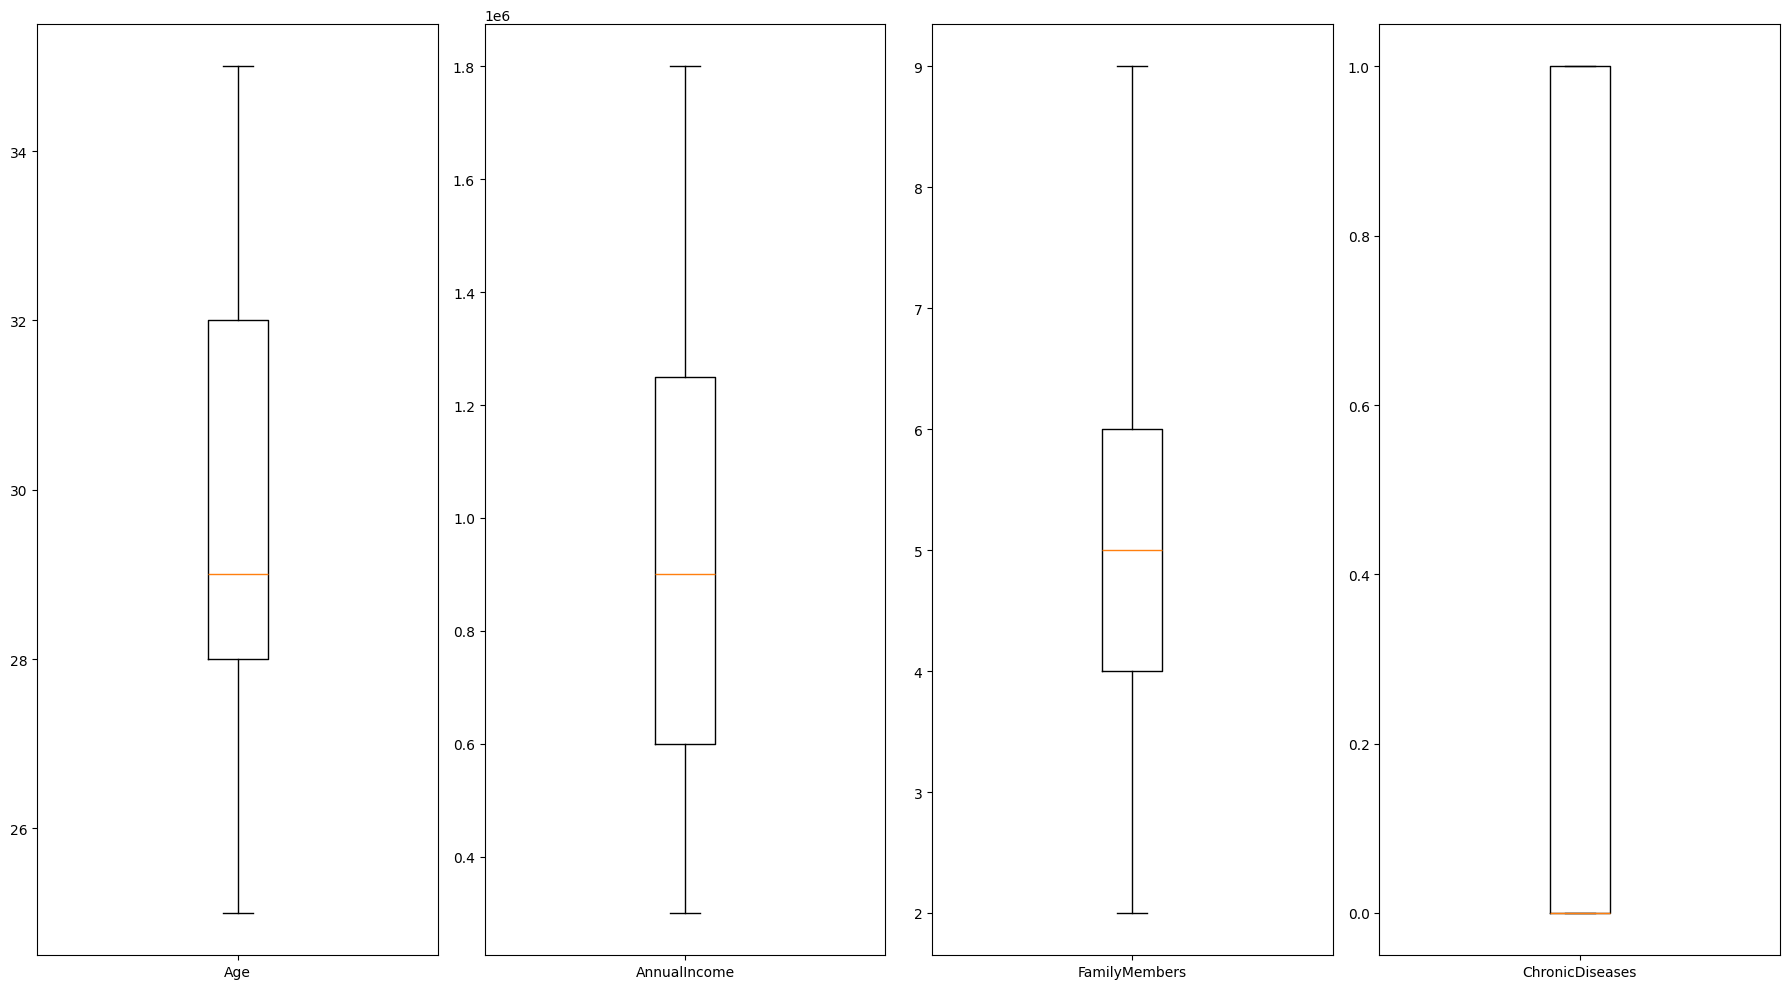

In [24]:
#check Outlier
numeric_cols = ["Age","AnnualIncome",'FamilyMembers','ChronicDiseases']
fig,axes = plt.subplots(figsize = (18,10), nrows =1 , ncols=4,squeeze = 0)
i = 0
for ax, col in zip(axes.reshape(-1), numeric_cols):
 ax.boxplot(df_filtered[col], tick_labels=[col], sym='k')
plt.tight_layout()

<h1> Encodeing <h1>

In [25]:
object_col = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

In [26]:
df_filtered = pd.get_dummies(df_filtered, columns = object_col,drop_first = True)

In [27]:
print(df_filtered.columns)

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_Yes',
       'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')


In [28]:
df_filtered.dtypes

,0
Age,int64
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
Employment Type_Private Sector/Self Employed,bool
GraduateOrNot_Yes,bool
FrequentFlyer_Yes,bool
EverTravelledAbroad_Yes,bool


In [29]:
df_filtered.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,False,True,False,False
1,31,1250000,7,0,True,True,False,False
2,34,500000,4,1,True,True,False,False
3,28,700000,3,1,True,True,False,False
4,28,700000,8,1,True,True,True,False


In [30]:
df_filtered.tail()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
1982,33,1500000,4,0,True,True,True,True
1983,28,1750000,5,1,True,True,False,True
1984,28,1150000,6,1,True,True,False,False
1985,34,1000000,6,0,True,True,True,True
1986,34,500000,4,0,True,True,False,False


In [31]:
df_filtered['Employment Type_Private Sector/Self Employed'] = df_filtered['Employment Type_Private Sector/Self Employed'].astype(int)
df_filtered['GraduateOrNot_Yes'] = df_filtered['GraduateOrNot_Yes'].astype(int)
df_filtered['FrequentFlyer_Yes'] = df_filtered['FrequentFlyer_Yes'].astype(int)
df_filtered['EverTravelledAbroad_Yes'] = df_filtered['EverTravelledAbroad_Yes'].astype(int)

In [32]:
df_filtered.dtypes

,0
Age,int64
AnnualIncome,int64
FamilyMembers,int64
ChronicDiseases,int64
Employment Type_Private Sector/Self Employed,int64
GraduateOrNot_Yes,int64
FrequentFlyer_Yes,int64
EverTravelledAbroad_Yes,int64


In [33]:
df_filtered.head(10)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Private Sector/Self Employed,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0
1,31,1250000,7,0,1,1,0,0
2,34,500000,4,1,1,1,0,0
3,28,700000,3,1,1,1,0,0
4,28,700000,8,1,1,1,1,0
5,25,1150000,4,0,1,0,0,0
6,31,1300000,4,0,0,1,0,0
7,31,1350000,3,0,1,1,1,1
8,28,1450000,6,1,1,1,1,1
9,33,800000,3,0,0,1,1,0


<H1>Split data  into x and y<H1>

In [34]:
x = df_filtered.values

In [35]:
print(x)

[[     31  400000       6 ...       1       0       0]
 [     31 1250000       7 ...       1       0       0]
 [     34  500000       4 ...       1       0       0]
 ...
 [     28 1150000       6 ...       1       0       0]
 [     34 1000000       6 ...       1       1       1]
 [     34  500000       4 ...       1       0       0]]


In [36]:
x.shape

(1987, 8)

In [37]:
y = df[['TravelInsurance']].values

In [38]:
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


<p> we will use knn model. therefore we will find k, which give us the most accuracy for model

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

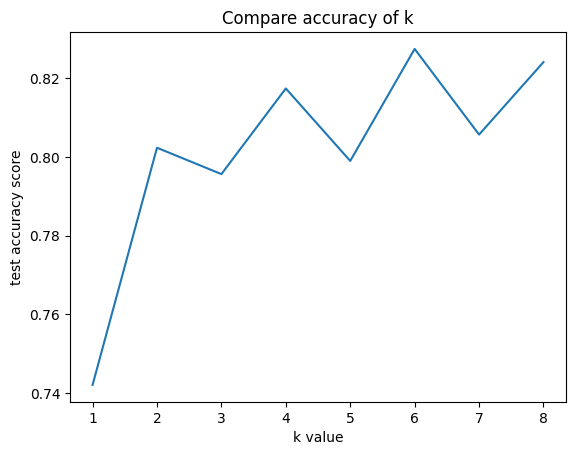

[0.74204355 0.80234506 0.79564489 0.81742044 0.79899497 0.82747069
 0.80569514 0.8241206 ]


In [40]:
#find the best k
k_nb = np.arange(1,9)
train_score = np.empty(len(k_nb))
test_score = np.empty(len(k_nb))

for i,k in enumerate(k_nb):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  train_score[i] = knn.score(x_train,y_train)
  test_score[i] = knn.score(x_test,y_test)

plt.title('Compare accuracy of k')
plt.plot(k_nb,test_score,label = 'test score')
plt.xlabel('k value')
plt.ylabel('test accuracy score')
plt.show()
print(test_score)

In [41]:
#best k_neighbors is 6

In [42]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       399
           1       0.85      0.58      0.69       198

    accuracy                           0.83       597
   macro avg       0.84      0.77      0.79       597
weighted avg       0.83      0.83      0.82       597

[[379  20]
 [ 83 115]]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
